In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches;
import numpy as np

img = plt.imread("sample.png")
img.shape


r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]

# weighted method to convert RGB(a) to Grayscale
# also use constant thresholding - 0.5
gray_scale = (0.33 * r + 0.33 * g + 0.33 * b) > 0.5

gray_scale

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [2]:
import sys

MAX_INT = sys.maxsize
MIN_INT = -1 * sys.maxsize

small_patches = []

window_size = 25

x_sq = 0;
y_sq = 0;

nodes_count = (int)(550 / window_size);
visited_nodes = np.full((nodes_count, nodes_count), 0)
nodes = np.full((nodes_count, nodes_count), 0)

# function to iterate  through all pixels in the capture window 
def contains(img, x_start, x_end, y_start, y_end):
    for x in range(x_start, x_end):
        for y in range(y_start, y_end):
            if gray_scale[x, y] == False : return True
    
    return False

while(x_sq * window_size < 550):
    y_sq = 0
    while(y_sq * window_size < 550):
        if contains(gray_scale, x_sq * window_size, (x_sq + 1) * window_size, y_sq * window_size, (y_sq + 1) * window_size):
            nodes[x_sq, y_sq] = True

            square = patches.Rectangle((y_sq * window_size, x_sq * window_size), window_size, window_size, alpha = 0.5)
            small_patches.append(square)

        y_sq = y_sq + 1
    x_sq = x_sq + 1


nodes

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1,

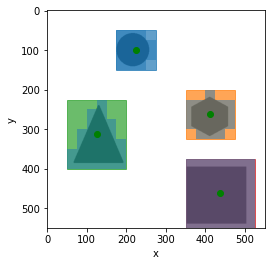

In [3]:
import matplotlib.colors as mcolors

fig, ax = plt.subplots()

shapes_colors = [i[0] for i in mcolors.TABLEAU_COLORS.items()]
shape_index = 0
shapes = []

class shape:
    def __init__(self, x_min, x_max, y_min, y_max, w_size, name):
        self.x_min = x_min * w_size
        self.x_max = x_max * w_size
        self.y_min = y_min * w_size
        self.y_max = y_max * w_size
        self.w_size = w_size
        self.x_center = (int)(((x_min + 1) * w_size + x_max * w_size ) / 2)
        self.y_center = (int)(((y_min + 1) * w_size + y_max * w_size ) / 2)
        self.name = name

    def get_height(self):
        return (self.x_max - self.x_min + self.w_size)

    def get_width(self):
        return (self.y_max - self.y_min + self.w_size)


def visit_node(x ,y, x_min, x_max, y_min, y_max):

    if x < 0 or x >= nodes_count or y < 0 or y >= nodes_count:
        return (MAX_INT, MIN_INT, MAX_INT, MIN_INT);

    if visited_nodes[x ,y] == True or nodes[x, y] == False:
        return (MAX_INT, MIN_INT, MAX_INT, MIN_INT);
    
    visited_nodes[x, y] = True

    (xmin1, xmax1 , ymin1 , ymax1) = visit_node(x + 1, y, x_min, x + 1, y_min, y_max)
    (xmin2, xmax2 , ymin2 , ymax2) = visit_node(x, y + 1, x_min, x_max, y_min, y + 1)
    (xmin3, xmax3 , ymin3 , ymax3) = visit_node(x - 1, y, x - 1, x_max, y_min, y_max)
    (xmin4, xmax4 , ymin4 , ymax4) = visit_node(x, y - 1, x_min, x_max, y - 1, y_max)

    return (
        min(x_min, xmin1, xmin2, xmin3, xmin4),
        max(x_max, xmax1, xmax2, xmax3, xmax4),
        min(y_min, ymin1, ymin2, ymin3, ymin4),
        max(y_max, ymax1, ymax2, ymax3, ymax4))    

for x in range(0, nodes_count):
    for y in range(0, nodes_count):
        # skip if we already detect this object
        if nodes[x, y] == True and visited_nodes[x, y] == False:
            (x_min, x_max, y_min, y_max) = visit_node(x ,y, x , x, y, y)

            visited_shape = shape(x_min, x_max, y_min, y_max, window_size, shapes_colors[shape_index])

            # rectangle patch
            square_patch = patches.Rectangle((visited_shape.y_min, visited_shape.x_min), visited_shape.get_width(), visited_shape.get_height(), color = shapes_colors[shape_index], alpha = 0.7)
            ax.add_patch(square_patch)

            # dot
            plt.plot(visited_shape.y_center, visited_shape.x_center, 'go')

            visited_nodes[x, y] = True
            shapes.append(visited_shape)
            shape_index = shape_index + 1

ax.set_xlabel("x")
ax.set_ylabel("y")

for patch in small_patches:
    ax.add_patch(patch)

plt.imshow(img)

plt.show()

In [4]:
import math

def calc_and_print_distance(shape1, shape2):
    distance = math.sqrt( math.pow(shape1.x_center - shape2.x_center, 2) + math.pow(shape1.y_center - shape2.y_center, 2))

    print("Shape {} | Shape {} | Distance {}".format(shape1.name, shape2.name, distance))

distances = [calc_and_print_distance(shapes[p1], shapes[p2]) for p1 in range(len(shapes)) for p2 in range(p1+1,len(shapes))]

Shape tab:blue | Shape tab:orange | Distance 247.41261083461367
Shape tab:blue | Shape tab:green | Distance 234.4013651837378
Shape tab:blue | Shape tab:red | Distance 419.5092370854306
Shape tab:orange | Shape tab:green | Distance 291.322844967572
Shape tab:orange | Shape tab:red | Distance 201.55644370746373
Shape tab:green | Shape tab:red | Distance 346.18492168203977
